In [70]:

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm # to observ the progression
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt

In [71]:
from google.colab import drive
drive.mount('/content/Mydrive', force_remount=True)

Mounted at /content/Mydrive


In [72]:
#Has to be done only the first time in Google Colab to upload eurosat.zip file
# from google.colab import files
# uploaded = files.upload()

In [73]:
#Better to do it each time since noticed some issue wiith images quantities if ot unzip each time
!unzip /content/Mydrive/MyDrive/EuroSAT.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: 2750/SeaLake/SeaLake_1772.jpg  
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/S

In [75]:
#Creating the path and check if working correctly
data_path = '/content/2750/'
!ls '/content/2750/'

'/content/2750/'

In [76]:
#Create the classes name and check how many classes existing (should be 10)
classes_name = os.listdir(data_path)
f'classes name list : {classes_name}    ;    Number of classes : {len(classes_name)} '

"classes name list : ['Highway', 'PermanentCrop', 'Forest', 'SeaLake', 'AnnualCrop', 'River', 'HerbaceousVegetation', 'Industrial', 'Residential', 'Pasture']    ;    Number of classes : 10 "

In [77]:
for i in range(len(classes_name)):
    images_per_cat = os.listdir(os.path.join(data_path, classes_name[i]))
    print(
        f'{classes_name[i]} :   {len(images_per_cat)} images'
        )   

Highway :   2500 images
PermanentCrop :   2500 images
Forest :   3000 images
SeaLake :   3000 images
AnnualCrop :   3000 images
River :   2500 images
HerbaceousVegetation :   3000 images
Industrial :   2500 images
Residential :   3000 images
Pasture :   2000 images


In [78]:
def load_data(data_path:str):
    
    classes = {
            'AnnualCrop':0,
            'Forest':1, 
            'HerbaceousVegetation':2,
            'Highway':3,
            'Industrial':4,
            'Pasture':5,
            'PermanentCrop':6,
            'Residential':7,
            'River':8,
            'SeaLake':9,
            }
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:3000]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                imgs.append(np.array(image)) # append imgs list
                labels.append(i) # append labels list 
    X = np.array(imgs)
    num_classes = len(set(labels)) # count number of classes (should give 10)
    y = np.array(labels)
    #y = to_categorical(labels, num_classes) # encode labels
    return X,y

In [79]:
X, y = load_data(data_path)

100%|██████████| 3000/3000 [00:00<00:00, 4604.70it/s]


In [80]:
#TA advices to use sklearn split method instead of previous one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)           # split Train and Test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) # split Train and val

In [81]:
#Check shape of X_train X_val X_test
X_train.shape, X_val.shape, X_test.shape

((19440, 64, 64, 3), (2160, 64, 64, 3), (5400, 64, 64, 3))

In [82]:
#Check shape of y_train _val y_test
y_train.shape, y_val.shape, y_test.shape

((19440,), (2160,), (5400,))

In [ ]:
#check if the dataset is balanced or unbalnced after splitting
print('_________   y_train   _________'))
np.unique(y_train, return_counts=True
print('_________   y_val   _________'))
np.unique(y_val, return_counts=True)
print('_________   y_test   _________'))
np.unique(y_test, return_counts=True)

In [86]:
 #Encode the y datas (need to be done outside the load_data function to be able to check the balance unbalance)
 y_train = to_categorical(y_train, 10) # encode labels
 y_val = to_categorical(y_val, 10) # encode labels
 y_test = to_categorical(y_test, 10) # encode labels

In [87]:
#Another way to check the balance/unbalance classes after splitting
#Keep alos this method since allow to check after the to_categorical
for i in range (10) :
  print(y_test[:,i].sum())


595.0
606.0
602.0
515.0
493.0
423.0
473.0
597.0
490.0
606.0


In [88]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((19440, 64, 64, 3),
 (2160, 64, 64, 3),
 (5400, 64, 64, 3),
 (19440, 10),
 (2160, 10),
 (5400, 10))

In [89]:
X_train[0].shape

(64, 64, 3)

In [90]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_model():
    
    model_ResNet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(X_train[0].shape)) 
    
    # Set the first layers to be untrainable
    model_ResNet50.trainable = True
    
    model = Sequential()  
    model.add(model_ResNet50)
    model.add(layers.Flatten())
    model.add(layers.Dense(49, activation='relu'))
    #model.add(layers.Dropout(0.1))
    model.add(layers.Dense(10, activation='softmax'))
  
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [91]:
model_ResNet50 = load_model()
model_ResNet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 49)                401457    
                                                                 
 dense_3 (Dense)             (None, 10)                500       
                                                                 
Total params: 23,989,669
Trainable params: 23,936,549
Non-trainable params: 53,120
_________________________________________________________________


Data preprocessing

In [94]:
#Convert array to tensor (speed conversion)
X_train_tensor = tf.convert_to_tensor(X_train)
X_val_tensor = tf.convert_to_tensor(X_val)
X_test_tensor = tf.convert_to_tensor(X_test)
type(X_train_tensor)

tensorflow.python.framework.ops.EagerTensor

In [95]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((19440, 64, 64, 3),
 (2160, 64, 64, 3),
 (5400, 64, 64, 3),
 (19440, 10),
 (2160, 10),
 (5400, 10))

Fit the model

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(model_ResNet50, X_train_tensor, y_train, X_val_tensor,y_val):

  es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

  history = model_ResNet50.fit(
                                X_train, y_train,
                                validation_data = (X_val_tensor,y_val),
                                epochs=100, 
                                batch_size=32, 
                                callbacks=[es])
  return history


In [97]:
history = fit_model(model_ResNet50,  X_train_tensor, y_train, X_val_tensor,y_val)

Epoch 1/100
608/608 [==============================] - 42s 60ms/step - loss: 0.3986 - accuracy: 0.8730 - val_loss: 0.1670 - val_accuracy: 0.9449
Epoch 2/100
608/608 [==============================] - 35s 58ms/step - loss: 0.1408 - accuracy: 0.9560 - val_loss: 0.4319 - val_accuracy: 0.8986
Epoch 3/100
608/608 [==============================] - 35s 58ms/step - loss: 0.0953 - accuracy: 0.9701 - val_loss: 0.2458 - val_accuracy: 0.9361
Epoch 4/100
608/608 [==============================] - 35s 58ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.2141 - val_accuracy: 0.9356
Epoch 5/100
608/608 [==============================] - 35s 58ms/step - loss: 0.0616 - accuracy: 0.9798 - val_loss: 0.1750 - val_accuracy: 0.9519
Epoch 6/100
608/608 [==============================] - 35s 58ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.1366 - val_accuracy: 0.9551
Epoch 7/100
608/608 [==============================] - 35s 58ms/step - loss: 0.0431 - accuracy: 0.9849 - val_loss: 0.1957 - val_ac

In [98]:
from tensorflow.keras import models
model_path = '/content/Mydrive/MyDrive/Models_ResNet50'
model_ResNet50._name='wfa'
models.save_model(model_ResNet50, model_path)

In [99]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Val'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Val'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

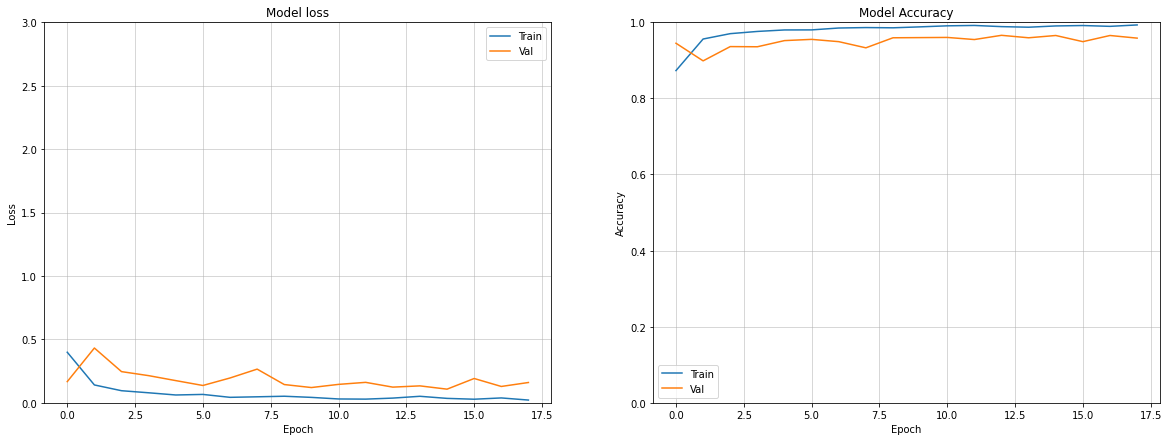

In [100]:
plot_loss_accuracy(history)

In [101]:
accuracy_test=model_ResNet50.evaluate(X_test_tensor, y_test)

169/169 [==============================] - 3s 19ms/step - loss: 0.1484 - accuracy: 0.9606


In [102]:
accuracy_test=accuracy_test[1]

In [103]:
accuracy_train=history.history['accuracy']
accuracy_train =np.mean(accuracy_train)
accuracy_train=accuracy_train.round(3)
accuracy_train

0.978

In [104]:
accuracy_val =history.history['val_accuracy']
accuracy_val =np.mean(accuracy_val)
accuracy_val=accuracy_val.round(3)
accuracy_val

0.95

In [105]:
accuracy_test=np.mean(accuracy_test)
accuracy_test=accuracy_test.round(3)
accuracy_test

0.961

In [106]:
!pip install mlflow==1.26.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
accuracy_train, accuracy_val, accuracy_test

(0.978, 0.95, 0.961)

In [113]:
import mlflow
model = model_ResNet50
mlflow.set_tracking_uri("https://mlflow.lewagon.ai")
mlflow.set_experiment(experiment_name="batch_1091_wfa")
params={
        'epochs' : 100,
        'patience' : 5,
        'learning_rate' :1e-4,
        'batch_size' : 32,
        'n_conv_2D' : 'N.A',
        'conv_2D_1' : 'N.A',
        'conv_2D_2' : 'N.A',
        'conv_2D_3' : 'N.A',
        'ks_1' : 'N.A',
        'ks_2' : 'N.A',
        'ks_3' : 'N.A',
        'Dense_1':'N.A',
        'DropOut':'No',
        'Flatten layer' : 'Yes',
        'Final_Dense_layer' : 46,
        'optimizers':'Adam',
        'top_layers': 'True',
        'comments':'ResNet50_Top=True, 46neurons'}
metrics={
    'accuracy_val': accuracy_val,
    #'accuracy_train': accuracy_train,
    'accuracy_test': accuracy_test
    }

with mlflow.start_run(run_name = 'Fabrice'):

              # STEP 1: push parameters to mlflow
            if params is not None:
                  mlflow.log_params(params)
            
            # STEP 2: push metrics to mlflow
            if metrics is not None:
                mlflow.log_metrics(metrics)

                
            #The lines below are uncommented since variables file is very bog (275MB)
            #MLFlow upload limit is 8MB, si not possible to push directly the ResNet modle to MLFlow
            
            # if model is not None:
            #       mlflow.keras.log_model(keras_model=model,
            #                              artifact_path="model",
            #                             keras_module="tensorflow.keras",
            #                             registered_model_name = 'wfa')
